# Factor Investing

In [1]:
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [13.5,12]

In [2]:
FamaFrenchData = pd.read_csv('~/Desktop/Portfolio/Portfolio Risk Management/datasets/FamaFrenchFactors.csv')
FamaFrenchData.head()

,Date,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
0,2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.0
1,2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.0
2,2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.0
3,2013-01-08,-0.004659,-0.0027,0.0004,-0.0007,-0.0012,0.0009,0.0
4,2013-01-09,0.004636,0.0034,0.0024,-0.0041,-0.0007,-0.0015,0.0


## Excess returns

In order to perform a robust analysis on our portfolio returns, we must first subtract the risk-free rate of return from your portfolio returns. The portfolio return minus the risk-free rate of return is known as the Excess Portfolio Return.

In the United States, the risk-free rate has been close to 0 since the financial crisis (2008), but this step is crucial for other countries with higher risk-free rates such as Venezuela or Brazil.

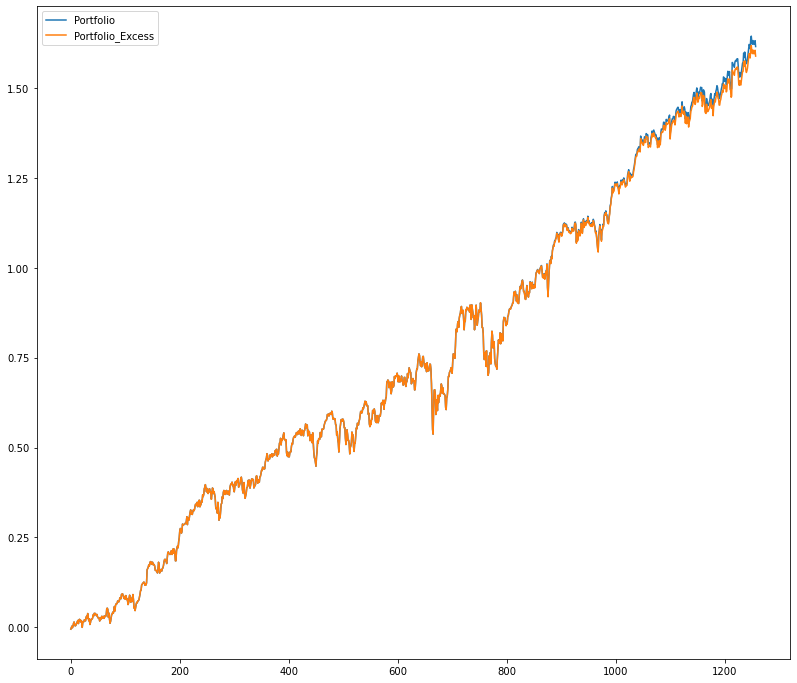

In [3]:
# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']

# Plot returns vs excess returns
CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

## Calculating beta using co-variance

Beta is an essential component of many financial models, and is a measure of systematic risk, or exposure to the broad market. In the CAPM model, beta is one of two essential factors.

Historical beta can be estimated in a number of ways. In this exercise, you will use the following simple formula involving co-variance and variance to a benchmark market portfolio:

In [4]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print(benchmark_variance)

# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient/benchmark_variance
print(portfolio_beta)

5.726126338154974e-05
5.8803350882118946e-05
0.9737755165745473


Our portfolio beta is 0.9738. You can think of market beta as a measure of your exposure to the broad stock market. 
For every 1.0% rise (or fall) in the market, you can expect your portfolio to rise (fall) roughly 0.97%.

## Calculating beta with CAPM

There are many ways to model stock returns, but the Capital Asset Pricing Model, or CAPM, is one the most well known:

In [5]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)

# Print adjusted r-squared of the fitted regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)

# Extract the beta
regression_beta = CAPM_fit.params['Market_Excess']
print(regression_beta)

0.7942627160017837
0.9737755165745476


Our portfolio beta is once again 0.9738. The adjusted r-squared is 0.7943. A high adjusted r-squared (close to 1) means that the majority of your portfolio's movements can be explained by the factors in your model.

## The Fama French 3-factor model

The Fama-French model famously adds two additional factors to the CAPM model to describe asset returns:

In [6]:
# Define the regression formula
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)

# Fit the regression
FamaFrench_fit = FamaFrench_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench_fit.rsquared_adj
print(regression_adj_rsq)

0.8193910088585149


The Fama-French 3 factor model fit well, raising the adjusted r-squared from 0.7943 to 0.8194, meaning that the model explains more of your portfolio variance. But there's still room for improvement...

## p-values and coefficients

Normally, p-values less than 0.05 are considered statistically significant.

A statistically significant negative SMB ('Small Minus Big') coefficient would signify a factor exposure to large cap stocks, while a positive coefficient would signify an exposure to small cap stocks.

In [7]:
# Extract the p-value of the SMB factor
smb_pval = FamaFrench_fit.pvalues['SMB']

# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params['SMB']
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  -0.26215152743192677  and is  significant


## The efficient market and alpha

The alpha (α) left over by the regression is unexplained performance due to unknown factors. In a regression model, this is simply the coefficient of the intercept.

There are two general schools of thought as to why:

    The model simply needs to be expanded. When you have found all of the missing economic factors, you can explain all stock and portfolio returns. This is known as the Efficient Market Hypothesis.
    
    There is a degree of unexplainable performance that no model will ever capture reliably. Perhaps it is due to skill, timing, intuition or luck, but investors should seek to maximize their alpha.

In [8]:
# Calculate your portfolio alpha
portfolio_alpha = FamaFrench_fit.params['Intercept']
print(portfolio_alpha)

# Annualize your portfolio alpha
portfolio_alpha_annualized = (((portfolio_alpha+1)**252)-1)
print(portfolio_alpha_annualized)

0.00018326665203183457
0.04726181730280854


## The 5-factor model

In 2015, Fama and French extended their previous 3-factor model, adding two additional factors:

    RMW: Profitability
    CMA: Investment
    
The RMW factor represents the returns of companies with high operating profitability versus those with low operating profitability, and the CMA factor represents the returns of companies with aggressive investments versus those who are more conservative.

In [9]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
FamaFrench5_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML + RMW + CMA ', data=FamaFrenchData)

# Fit the regression
FamaFrench5_fit = FamaFrench5_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench5_fit.rsquared_adj
print(regression_adj_rsq)

0.8367245019225789
